### Introduction

* Dataset available in scikit-learn
* contains metrics such as population, median income, median housing price, etc.
* sample data are for different block groups which can be treated as districts


### Machine Learning project checklist

* Frame the problem and look at the big picture
* Get the data (scikit-learn)
* Explore the data to gain insights (pandas, matplotlib)
* Prepare the data to better expose the underlying data patterns to Machine Learning algorithms
* Explore different models and short-list the best ones
* Fine-tune your models, adjust parameters and combine them into a solution
* Launch, monitor, maintain the deployed solution

# Frame the problem

Determine whether it is worth investing in a given area or not via predicted housing prices

* Supervised or unsupervised or mixed?
* Classification or Regression or something else?
* Batch learning or online learning?
* Which performance measure?
* Prices into categories like cheap, moderately expensive, expensive?

# Get the Data

May need to deal with relational database, documents, authorization, download, conversions

* http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

* http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

* https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv

Optional exercise: write a function to automate retrieving the dataset

In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

pd.options.display.max_rows = 14

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [57]:
housing = pd.read_csv('housing.csv')
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

# Explore the data

In [91]:
housing.info()
# housing.isnull().any(axis=1)
housing[housing.isnull().any(axis=1)]
housing.loc[:, housing.isnull().any(axis=0)]
housing.loc[housing.isnull().any(axis=1), housing.isnull().any(axis=0)]
# How to deal with these missing values?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 3153 to 3734
Data columns (total 14 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16359 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
median_house_value          16512 non-null float64
ocean_proximity             16512 non-null object
rooms_per_household         16512 non-null float64
bedrooms_per_household      16359 non-null float64
bedrooms_per_room           16359 non-null float64
population_per_household    16512 non-null float64
dtypes: float64(13), object(1)
memory usage: 2.5+ MB


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3354     -120.67     40.50                15.0       5343.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
4743     -118.36     34.05                42.0       1372.0             NaN   
19959    -119.32     36.25                21.0       1231.0             NaN   
10236    -117.92     33.87                33.0       1597.0             NaN   
7228     -118.16     34.01                40.0       1552.0             NaN   
19060    -122.41     38.16                37.0       1549.0             NaN   
...          ...       ...                 ...          ...             ...   
2301     -119.78     36.82                25.0       5016.0             NaN   
13069    -121.30     38.58                16.0       1537.0             NaN   
2578     -124.06     40.86                34.0       4183.0             NaN   
4600     -118.27     34.04                13.0       1784.0             NaN   
14970    -117.01     32.74                31.0       3473.0             NaN   
10385    -117.65     33.60                15.0       5736.0             NaN   
1456     -121.98     37.96                22.0       2987.0             NaN   

       population  households  median_income  median_house_value  \
3354       2503.0       902.0         3.5962             85900.0   
20268      1938.0       762.0         1.6953            167400.0   
4743        674.0       271.0         2.8793            202100.0   
19959       609.0       206.0         2.8365             90000.0   
10236      1888.0       423.0         3.0550            157800.0   
7228       1919.0       427.0         2.2596            137500.0   
19060       863.0       275.0         2.7457            254700.0   
...           ...         ...            ...                 ...   
2301       2133.0       928.0         3.6250             89500.0   
13069      1125.0       375.0         2.6471             90700.0   
2578       1891.0       669.0         3.2216             98100.0   
4600       2158.0       682.0         1.7038            118100.0   
14970      2098.0       677.0         2.6973            135200.0   
10385      2529.0       762.0         6.4114            278700.0   
1456       1420.0       540.0         3.6500            204100.0   

      ocean_proximity  rooms_per_household  bedrooms_per_household  \
3354           INLAND             5.923503                     NaN   
20268      NEAR OCEAN             3.140420                     NaN   
4743        <1H OCEAN             5.062731                     NaN   
19959          INLAND             5.975728                     NaN   
10236       <1H OCEAN             3.775414                     NaN   
7228        <1H OCEAN             3.634660                     NaN   
19060        NEAR BAY             5.632727                     NaN   
...               ...                  ...                     ...   
2301           INLAND             5.405172                     NaN   
13069          INLAND             4.098667                     NaN   
2578       NEAR OCEAN             6.252616                     NaN   
4600        <1H OCEAN             2.615836                     NaN   
14970       <1H OCEAN             5.129985                     NaN   
10385       <1H OCEAN             7.527559                     NaN   
1456           INLAND             5.531481                     NaN   

       bedrooms_per_room  population_per_household  
3354                 NaN                  2.774945  
20268                NaN                  2.543307  
4743                 NaN                  2.487085  
19959                NaN                  2.956311  
10236                NaN                  4.463357  
7228                 NaN                  4.494145  
19060                NaN                  3.138182  
...                  ...                       ...  
2301                 NaN                  2.298491  
13

total_bedrooms  bedrooms_per_household  bedrooms_per_room
3153            812.0                1.215569           0.198825
2579            428.0                1.067332           0.177299
16718           945.0                1.067797           0.213704
5373            771.0                1.017150           0.256572
20311           105.0                1.265060           0.223404
1727            402.0                1.148571           0.255725
1553            422.0                0.992941           0.125820
...               ...                     ...                ...
13893           556.0                1.155925           0.236395
20015           339.0                1.076190           0.180319
18879           395.0                1.023316           0.325639
19612           410.0                1.242424           0.181175
4624            246.0                1.205882           0.250254
7214            219.0                1.084158           0.288158
3734            126.0                0.976744           0.241843

[16512 rows x 3 columns]

total_bedrooms  bedrooms_per_household  bedrooms_per_room
3354              NaN                     NaN                NaN
20268             NaN                     NaN                NaN
4743              NaN                     NaN                NaN
19959             NaN                     NaN                NaN
10236             NaN                     NaN                NaN
7228              NaN                     NaN                NaN
19060             NaN                     NaN                NaN
...               ...                     ...                ...
2301              NaN                     NaN                NaN
13069             NaN                     NaN                NaN
2578              NaN                     NaN                NaN
4600              NaN                     NaN                NaN
14970             NaN                     NaN                NaN
10385             NaN                     NaN                NaN
1456              NaN                     NaN                NaN

[153 rows x 3 columns]

In [59]:
housing['ocean_proximity'].unique()
housing['ocean_proximity'].value_counts()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype=object)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [60]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [61]:
# x = housing.hist(bins=50, figsize=(20, 15))
# plt.show()

# median income attribute is scaled between 0 to 15?
# max median age 52?
# max median house value $500,000?
# different scales
# positively skewed

In [62]:
# Split the dataset into training and test sets
# 1. Randomised split (works for large datasets)
import sklearn.model_selection as ms
# `random_state` is the seed; use it so that the dataset is split in the same way on every single run
rn_train_set, rn_test_set = ms.train_test_split(housing, test_size = 0.2, random_state=42)  
rn_train_set.shape
rn_test_set.shape

(16512, 10)

(4128, 10)

In [63]:
# 1. Categorised split (might be needed for small datasets)
housing['median_income'].min(), housing['median_income'].max()
# can compute n = (max - min) / (splits + 1), we just use n = 1.5 below
income_categories = housing['median_income'] // 1.5
income_categories.min(), income_categories.max(), income_categories.shape
income_categories.unique().size

# Or use np.ceil or np.floor
# income_categories2 = np.floor(housing['median_income'] / 1.5)
# income_categories2.min(), income_categories2.max(), income_categories2.shape
# income_categories2.unique().size

(0.49990000000000001, 15.0001)

(0.0, 10.0, (20640,))

11

In [64]:
# housing['income_category'] = income_categories

housing.groupby(income_categories).size()
#x = income_categories.plot(kind='hist')
# Too few values from 5-10 income categories, so let us put them in one category
# i.e. if income_category of a row is greater than or equal to 5, assign category 5 to it
# why does this cause no problems?

median_income
0.0      815
1.0     6550
2.0     7250
3.0     3652
4.0     1423
5.0      543
6.0      189
7.0      105
8.0       50
9.0       12
10.0      51
dtype: int64

In [65]:
income_categories[income_categories >= 5] = 5
income_categories.shape
income_categories.value_counts()
#x = income_categories.plot(kind='hist')

(20640,)

2.0    7250
1.0    6550
3.0    3652
4.0    1423
5.0     950
0.0     815
Name: median_income, dtype: int64

In [66]:
split = ms.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#split.split?

In [67]:
for training_indices, test_indices in split.split(housing, income_categories):
    stratified_train_set = housing.loc[training_indices]
    stratified_test_set = housing.loc[test_indices]
### TODO: Convert this into a function    
stratified_train_set.shape
stratified_test_set.shape

(16512, 10)

(4128, 10)

In [68]:
h = housing.groupby(income_categories).size() / len(housing)
h.name = 'housing'
#str_train = stratified_train_set.groupby(income_categories).size() / len(stratified_train_set)
#str_train.name = 'stratified train'
str_test = stratified_test_set.groupby(income_categories).size() / len(stratified_test_set)
str_test.name = 'stratified test'

#rn_train = rn_train_set.groupby(income_categories).size() / len(rn_train_set)
#rn_train.name = 'random train'
rn_test = rn_test_set.groupby(income_categories).size() / len(rn_test_set)
rn_test.name = 'random test'

compare = pd.concat([h, str_test, rn_test], axis=1)
compare['stratified test %'] = 100 * (compare['stratified test'] - compare['housing']) / compare['housing']
compare['random test %'] = 100 * (compare['random test'] - compare['housing']) / compare['housing']
compare

housing  stratified test  random test  stratified test %  \
median_income                                                              
0.0            0.039486         0.039486     0.039971           0.000000   
1.0            0.317345         0.317345     0.322674           0.000000   
2.0            0.351260         0.351260     0.359254           0.000000   
3.0            0.176938         0.176841     0.168605          -0.054765   
4.0            0.068944         0.069041     0.064438           0.140548   
5.0            0.046027         0.046027     0.045058           0.000000   

               random test %  
median_income                 
0.0                 1.226994  
1.0                 1.679389  
2.0                 2.275862  
3.0                -4.709748  
4.0                -6.535488  
5.0                -2.105263

In [69]:
housing = stratified_train_set.copy()
#x = housing.plot(kind='scatter', x='longitude', y='latitude')

In [70]:
#x = housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

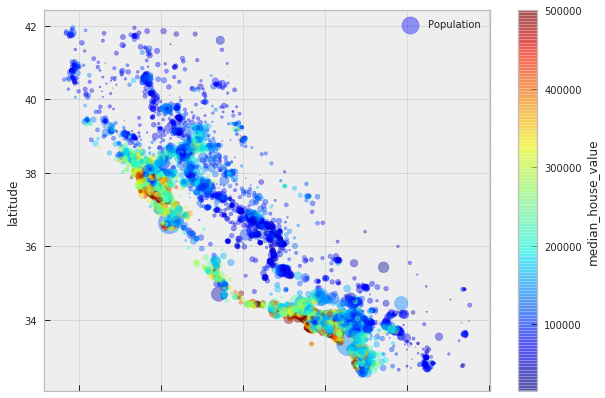

In [71]:
x = housing.plot(kind='scatter', 
             x='longitude', 
             y='latitude', 
             alpha=0.4, 
             s=housing['population']/60, 
             label='Population',
             figsize=(10,7),
             c='median_house_value',
             cmap=plt.get_cmap('jet'),
             colorbar=True)
x = plt.legend()

In [72]:
corr_matrix = housing.corr()
corr_matrix = np.abs(corr_matrix)
corr_matrix = corr_matrix.median_house_value.sort_values(ascending=False)
corr_matrix

median_house_value    1.000000
median_income         0.685916
latitude              0.142955
total_rooms           0.129694
housing_median_age    0.105802
households            0.061859
longitude             0.047490
total_bedrooms        0.046865
population            0.030821
Name: median_house_value, dtype: float64

In [73]:
corr_columns = corr_matrix.index[:5]
housing[corr_columns].head()
#x = pd.plotting.scatter_matrix(housing[correlated_columns], alpha=0.4, figsize=(12, 8), diagonal='kde')

median_house_value  median_income  latitude  total_rooms  \
3153              85500.0         3.2405     35.12       4084.0   
2579             143000.0         3.5156     40.85       2414.0   
16718            171300.0         2.8285     35.49       4422.0   
5373             309100.0         2.0437     34.04       3005.0   
20311            243800.0         2.0368     34.17        470.0   

       housing_median_age  
3153                 16.0  
2579                 31.0  
16718                17.0  
5373                 36.0  
20311                37.0

In [74]:
import seaborn as sns
sns.set(style='ticks')
#x = sns.pairplot(housing[correlated_columns])

In [75]:
income_categories.name = 'income_categories'
# x = sns.pairplot(pd.concat([housing[corr_columns], income_categories], axis=1, join='inner'), hue='income_categories')

In [76]:
#x = sns.lmplot('median_income', 'median_house_value', data=housing, fit_reg=False)

# Prepare the data
Should some attributes be dropped or combined together?

In [77]:
housing['rooms_per_household'] = housing.total_rooms / housing.households
housing['bedrooms_per_household'] = housing.total_bedrooms / housing.households
housing['bedrooms_per_room'] = housing.total_bedrooms / housing.total_rooms
housing['population_per_household'] = housing.population / housing.households

### TODO: Convert this into a function

housing.head()

corr_matrix2 = housing.corr()
corr_matrix2 = np.abs(corr_matrix2)
corr_matrix2.median_house_value.sort_values(ascending=False)

# You can come back and iterate this step many times

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3153     -118.46     35.12                16.0       4084.0           812.0   
2579     -124.05     40.85                31.0       2414.0           428.0   
16718    -120.66     35.49                17.0       4422.0           945.0   
5373     -118.38     34.04                36.0       3005.0           771.0   
20311    -119.11     34.17                37.0        470.0           105.0   

       population  households  median_income  median_house_value  \
3153       2033.0       668.0         3.2405             85500.0   
2579       1005.0       401.0         3.5156            143000.0   
16718      2307.0       885.0         2.8285            171300.0   
5373       2054.0       758.0         2.0437            309100.0   
20311       522.0        83.0         2.0368            243800.0   

      ocean_proximity  rooms_per_household  bedrooms_per_household  \
3153           INLAND             6.113772                1.215569   
2579       NEAR OCEAN             6.019950                1.067332   
16718       <1H OCEAN             4.996610                1.067797   
5373        <1H OCEAN             3.964380                1.017150   
20311      NEAR OCEAN             5.662651                1.265060   

       bedrooms_per_room  population_per_household  
3153            0.198825                  3.043413  
2579            0.177299                  2.506234  
16718           0.213704                  2.606780  
5373            0.256572                  2.709763  
20311           0.223404                  6.289157

median_house_value          1.000000
median_income               0.685916
bedrooms_per_room           0.249257
rooms_per_household         0.154070
latitude                    0.142955
total_rooms                 0.129694
housing_median_age          0.105802
households                  0.061859
longitude                   0.047490
total_bedrooms              0.046865
bedrooms_per_household      0.042540
population                  0.030821
population_per_household    0.022350
Name: median_house_value, dtype: float64

## Transform the data
Always create functions to transform the data, this will you help with:
reproduce transformations easily on new data recieved in future for further training
use the functions in production system to transform non-training data
make it easy to try various transformations and select the best one.

## Step 1: Split the training data set into features and labels

In [78]:
housing_features = stratified_train_set.drop('median_house_value', axis=1)
housing_features.head()
housing_labels = stratified_train_set.median_house_value.copy()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3153     -118.46     35.12                16.0       4084.0           812.0   
2579     -124.05     40.85                31.0       2414.0           428.0   
16718    -120.66     35.49                17.0       4422.0           945.0   
5373     -118.38     34.04                36.0       3005.0           771.0   
20311    -119.11     34.17                37.0        470.0           105.0   

       population  households  median_income ocean_proximity  
3153       2033.0       668.0         3.2405          INLAND  
2579       1005.0       401.0         3.5156      NEAR OCEAN  
16718      2307.0       885.0         2.8285       <1H OCEAN  
5373       2054.0       758.0         2.0437       <1H OCEAN  
20311       522.0        83.0         2.0368      NEAR OCEAN

## Step 2: Data Cleaning. Handle NaNs in total_bedrooms column
Drop corresponding observations? Drop whole column? Set the NaN values to mean/median?

In [79]:
### A. Manual method
# housing_features.dropna(subset=['total_bedrooms'])  # 1. drop rows
# housing_features.drop('total_bedrooms', axis=1)     # 2. drop column
median = housing_features['total_bedrooms'].median() 
median
housing_features.head()
# Always save computed median in a variable. You need it to replace NaN values in total_bedroom 
# column in future data. Always save and use this value instead of computing it again later
# because the model has been trained with this median value

433.0

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3153     -118.46     35.12                16.0       4084.0           812.0   
2579     -124.05     40.85                31.0       2414.0           428.0   
16718    -120.66     35.49                17.0       4422.0           945.0   
5373     -118.38     34.04                36.0       3005.0           771.0   
20311    -119.11     34.17                37.0        470.0           105.0   

       population  households  median_income ocean_proximity  
3153       2033.0       668.0         3.2405          INLAND  
2579       1005.0       401.0         3.5156      NEAR OCEAN  
16718      2307.0       885.0         2.8285       <1H OCEAN  
5373       2054.0       758.0         2.0437       <1H OCEAN  
20311       522.0        83.0         2.0368      NEAR OCEAN

In [80]:
#nan_indices = housing_features.loc[housing_features.isnull().any(axis=1)].index
#nan_indices
housing2 = housing_features.fillna(median) # 3. replace NaNs with median
#housing2.head()
#housing2.loc[nan_indices]
#housing2.isnull().any()

In [81]:
### B. Imputer method
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
# how to save median value now to be used in future data?

housing_numeric = housing_features.drop('ocean_proximity', axis=1)

imputer.fit(housing_numeric)  # can use imputer.fit_transform()
imputer.statistics_
housing_numeric.median().values

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

array([ -118.52  ,    34.26  ,    29.    ,  2127.    ,   433.    ,
        1162.    ,   409.    ,     3.5417])

array([ -118.52  ,    34.26  ,    29.    ,  2127.    ,   433.    ,
        1162.    ,   409.    ,     3.5417])

In [82]:
# what's the state of the dataframe before transform:
housing_numeric[housing_numeric.isnull().any(axis=1)]
housing_numeric[housing_numeric['total_bedrooms'] == 433]
housing_numeric.isnull().any()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3354     -120.67     40.50                15.0       5343.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
4743     -118.36     34.05                42.0       1372.0             NaN   
19959    -119.32     36.25                21.0       1231.0             NaN   
10236    -117.92     33.87                33.0       1597.0             NaN   
7228     -118.16     34.01                40.0       1552.0             NaN   
19060    -122.41     38.16                37.0       1549.0             NaN   
...          ...       ...                 ...          ...             ...   
2301     -119.78     36.82                25.0       5016.0             NaN   
13069    -121.30     38.58                16.0       1537.0             NaN   
2578     -124.06     40.86                34.0       4183.0             NaN   
4600     -118.27     34.04                13.0       1784.0             NaN   
14970    -117.01     32.74                31.0       3473.0             NaN   
10385    -117.65     33.60                15.0       5736.0             NaN   
1456     -121.98     37.96                22.0       2987.0             NaN   

       population  households  median_income  
3354       2503.0       902.0         3.5962  
20268      1938.0       762.0         1.6953  
4743        674.0       271.0         2.8793  
19959       609.0       206.0         2.8365  
10236      1888.0       423.0         3.0550  
7228       1919.0       427.0         2.2596  
19060       863.0       275.0         2.7457  
...           ...         ...            ...  
2301       2133.0       928.0         3.6250  
13069      1125.0       375.0         2.6471  
2578       1891.0       669.0         3.2216  
4600       2158.0       682.0         1.7038  
14970      2098.0       677.0         2.6973  
10385      2529.0       762.0         6.4114  
1456       1420.0       540.0         3.6500  

[153 rows x 8 columns]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16074    -122.49     37.74                52.0       2189.0           433.0   
4814     -118.28     34.04                39.0       1155.0           433.0   
5750     -118.28     34.17                52.0       2332.0           433.0   
17095    -122.24     37.47                36.0       2021.0           433.0   
3195     -119.73     36.31                20.0       2440.0           433.0   
2875     -118.97     35.39                38.0       2121.0           433.0   
4990     -118.31     33.99                48.0       2235.0           433.0   
...          ...       ...                 ...          ...             ...   
18113    -122.02     37.31                34.0       2629.0           433.0   
16346    -121.34     38.03                12.0       2707.0           433.0   
17194    -119.79     34.45                24.0       2746.0           433.0   
18368    -121.98     37.16                42.0       2533.0           433.0   
5035     -118.34     33.99                48.0       2225.0           433.0   
16781    -122.48     37.67                31.0       2609.0           433.0   
5279     -118.47     34.06                45.0       3030.0           433.0   

       population  households  median_income  
16074      1147.0       420.0         3.4583  
4814       1857.0       424.0         2.1696  
5750       1135.0       440.0         5.5658  
17095      1117.0       432.0         3.9290  
3195       1579.0       400.0         2.8281  
2875       1547.0       441.0         2.7740  
4990       1363.0       433.0         1.6559  
...           ...         ...            ...  
18113      1301.0       431.0         6.0830  
16346      1200.0       380.0         4.9861  
17194      1076.0       380.0         5.8635  
18368       957.0       398.0         5.3468  
5035       1170.0       401.0         2.9643  
16781      1746.0       464.0         5.1054  
5279        916.0       399.0         9.4664  

[26 rows x 8 columns]

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
dtype: bool

In [83]:
# transform:
X = imputer.transform(housing_numeric)
housing_features_tr = pd.DataFrame(X, columns=housing_numeric.columns)
### TODO: Convert this into a function

housing_features_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -118.46     35.12                16.0       4084.0           812.0   
1    -124.05     40.85                31.0       2414.0           428.0   
2    -120.66     35.49                17.0       4422.0           945.0   
3    -118.38     34.04                36.0       3005.0           771.0   
4    -119.11     34.17                37.0        470.0           105.0   

   population  households  median_income  
0      2033.0       668.0         3.2405  
1      1005.0       401.0         3.5156  
2      2307.0       885.0         2.8285  
3      2054.0       758.0         2.0437  
4       522.0        83.0         2.0368

In [84]:
# verify if transformation worked correctly:
housing_features_tr.isnull().any()
housing_features_tr[housing_features_tr['total_bedrooms'] == 433]

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
dtype: bool

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
27       -122.49     37.74                52.0       2189.0           433.0   
118      -120.67     40.50                15.0       5343.0           433.0   
141      -119.18     34.19                19.0       2393.0           433.0   
160      -118.36     34.05                42.0       1372.0           433.0   
162      -119.32     36.25                21.0       1231.0           433.0   
189      -117.92     33.87                33.0       1597.0           433.0   
224      -118.16     34.01                40.0       1552.0           433.0   
...          ...       ...                 ...          ...             ...   
15714    -122.48     37.67                31.0       2609.0           433.0   
15761    -124.06     40.86                34.0       4183.0           433.0   
15914    -118.47     34.06                45.0       3030.0           433.0   
15959    -118.27     34.04                13.0       1784.0           433.0   
15968    -117.01     32.74                31.0       3473.0           433.0   
16393    -117.65     33.60                15.0       5736.0           433.0   
16498    -121.98     37.96                22.0       2987.0           433.0   

       population  households  median_income  
27         1147.0       420.0         3.4583  
118        2503.0       902.0         3.5962  
141        1938.0       762.0         1.6953  
160         674.0       271.0         2.8793  
162         609.0       206.0         2.8365  
189        1888.0       423.0         3.0550  
224        1919.0       427.0         2.2596  
...           ...         ...            ...  
15714      1746.0       464.0         5.1054  
15761      1891.0       669.0         3.2216  
15914       916.0       399.0         9.4664  
15959      2158.0       682.0         1.7038  
15968      2098.0       677.0         2.6973  
16393      2529.0       762.0         6.4114  
16498      1420.0       540.0         3.6500  

[179 rows x 8 columns]

### Feature scaling: Min-max or Standardisation
Min-max scaling: 
* (value - min) / (max - min)
* scaled values range from 0 to 1
* sensitive to outliers
* MinMaxScaler()

Standardisation:
* (value - mean) / variance
* not as sensitive to outliers
* range not between 0 and 1 which could be problematic for some models(neural networks)
* StandardScaler()

### Numeric representation of categorical data:
* factorize() in pandas maps each category to a sequential number
* OneHotEncoder in Scikit-Learn converts integer values into one-hot vectors in
  the form of a sparse matrix
* CategoricalEncoder works directly on categorical data

In [85]:
housing_categorical = housing_features['ocean_proximity']
housing_categorical.head(10)

3153         INLAND
2579     NEAR OCEAN
16718     <1H OCEAN
5373      <1H OCEAN
20311    NEAR OCEAN
1727       NEAR BAY
1553      <1H OCEAN
2098         INLAND
9390       NEAR BAY
5573      <1H OCEAN
Name: ocean_proximity, dtype: object

In [86]:
housing_cat_encoded, housing_cat_names = housing_categorical.factorize()
housing_cat_encoded[:10]
housing_cat_names

array([0, 1, 2, 2, 1, 3, 2, 0, 3, 2])

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [87]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
housing_1hot_ohe = ohe.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_1hot_ohe

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [88]:
# How to handle categorical data: http://scikit-learn.org/dev/modules/preprocessing.html#preprocessing-categorical-features
# http://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.CategoricalEncoder.html
# Pull request: https://github.com/scikit-learn/scikit-learn/commit/a2ebb8cfd2d126ad8e6fb36e0bdadba7de8fcd9f
# New features in dev version: http://scikit-learn.org/dev/whats_new.html
# Code for CategoricalEncoder: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/preprocessing/data.py

# from sklearn.preprocessing import CategoricalEncoder

%run 'CategoricalEncoder.py'

enc = CategoricalEncoder()
housing_1hot = enc.fit_transform(housing_categorical.values.reshape(-1, 1))
housing_1hot

ERROR:root:File `'CategoricalEncoder.py'` not found.


NameError: name 'CategoricalEncoder' is not defined

## Write all the transformation functions/classes

In [ ]:
# Create the following using FunctionTransformer?
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column_names):
        self.column_names = column_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.column_names].values

rooms_col, bedrooms_col, population_col, households_col = 3, 4, 5, 6

class AttributeAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rph = X[:, rooms_col] / X[:, households_col]
        bph = X[:, bedrooms_col] / X[:, households_col]
        bpr = X[:, bedrooms_col] / X[:, rooms_col]
        pph = X[:, population_col] / X[:, households_col]
        return np.c_[X, rph, bph, bpr, pph]

# attribute_adder = AttributeAdder()
# housing_full = attribute_adder.transform(housing.values)

In [ ]:
# housing_features = stratified_train_set.drop('median_house_value', axis=1)
# housing_numeric = housing_features.drop('ocean_proximity', axis=1)
numeric_cols = list(housing_numeric)
categorical_cols = ['ocean_proximity']

# use `make_pipeline` to make this code simpler; estimator names can be skipped: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html
numeric_cols_pipeline = Pipeline([('selector', ColumnSelector(numeric_cols)),
                                  ('imputer', Imputer(strategy='median')),
                                  ('attributes_adder', AttributeAdder()),
                                  ('standard_scaler', StandardScaler())
                                 ])

categorical_cols_pipeline = Pipeline([('selector', ColumnSelector(categorical_cols)),
                                      ('encoder', CategoricalEncoder(encoding='onehot-dense'))
                                     ])

full_pipeline = FeatureUnion(transformer_list=[('numeric_pipeline', numeric_cols_pipeline),
                                               ('categorical_pipeline', categorical_cols_pipeline)
                                              ])

# housing_numeric_transformed = numeric_cols_pipeline.fit_transform(housing_numeric)
# housing_categorical_transformed = categorical_cols_pipeline.fit_transform(housing.ocean_proximity)

housing_transformed = full_pipeline.fit_transform(housing)
housing_transformed.shape
housing_transformed

In [ ]:
# Assignments:
# Try alternative strategies
# Fix errors
# Use Seaborn for plots